In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

In [5]:
df['Production (Tons)']=df['Production (Tons)'].str.replace(".","")

In [6]:
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.',"").str.replace(',','.')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.',"")
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.',"").str.replace(',','.')


In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df[df['Acreage (Hectare)'].isna()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
df.dropna().reset_index()

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


In [10]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [11]:
df['Production (Tons)']=df['Production (Tons)'].astype(float)
df['Production per Person (Kg)']=df['Production per Person (Kg)'].astype(float)
df['Acreage (Hectare)']=df['Acreage (Hectare)'].astype(float)
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].astype(float)




In [12]:
df.dtypes

Unnamed: 0                      int64
Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [13]:
df.nunique()

Unnamed: 0                    103
Country                       103
Continent                       6
Production (Tons)             103
Production per Person (Kg)    102
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

### Analysis for continent

In [14]:
df_continent=df.groupby("Continent").sum()

In [20]:
df_continent.drop(["Country"],axis=1,inplace=True)

In [21]:
df_continent

,Unnamed: 0,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,2160,89681525.0,2332687.293,1439089.0,2142107.5
Asia,1253,721930425.0,1857769.303,10608319.0,1171871.4
Europe,189,5823.0,536.000,71.0,131870.9
North America,1101,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,227,36177574.0,28593.605,490909.0,162419.1
South America,323,865588126.0,3505531.738,11369236.0,677192.7


## which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

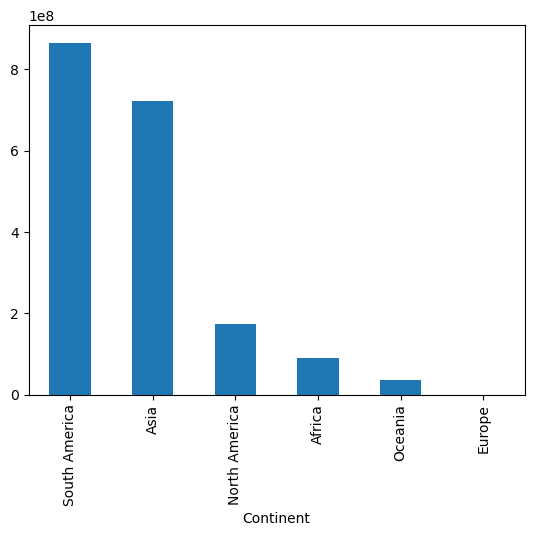

In [22]:
df_continent["Production (Tons)"].sort_values(ascending=False).plot(kind="bar")

## Does no of countries in thee continent affects the production of the continent?

In [24]:
df_continent["no_of_countries"]=df.groupby("Continent").count()["Country"]

In [26]:
df_continent

,Unnamed: 0,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),no_of_countries
Continent,,,,,,
Africa,2160,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,1253,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,189,5823.0,536.000,71.0,131870.9,2
North America,1101,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,227,36177574.0,28593.605,490909.0,162419.1,4
South America,323,865588126.0,3505531.738,11369236.0,677192.7,11


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


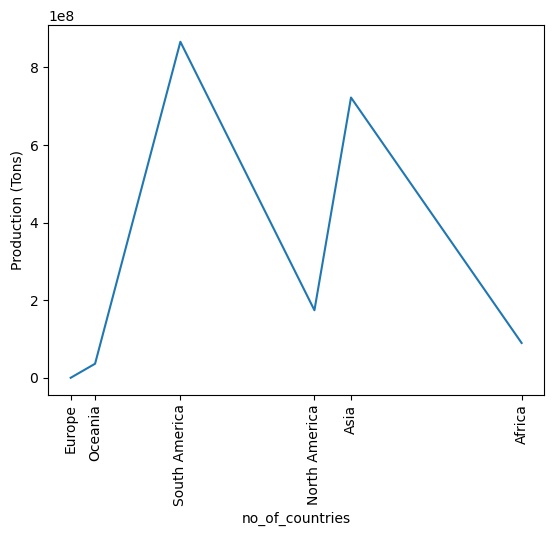

In [29]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x="no_of_countries",y="Production (Tons)")
plt.xticks(df_continent["no_of_countries"],continent_names, rotation=90)
plt.show()

### correlation of continent

In [25]:
df_continent.corr()

,Unnamed: 0,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),no_of_countries
Unnamed: 0,1.000000,-0.050645,0.405965,-0.019018,0.977126,0.986087
Production (Tons),-0.050645,1.000000,0.522207,0.994897,0.091201,0.098495
Production per Person (Kg),0.405965,0.522207,1.000000,0.463211,0.542971,0.531984
Acreage (Hectare),-0.019018,0.994897,0.463211,1.000000,0.111166,0.122407
Yield (Kg / Hectare),0.977126,0.091201,0.542971,0.111166,1.000000,0.991746
no_of_countries,0.986087,0.098495,0.531984,0.122407,0.991746,1.000000


## production distribution of continents

<Axes: ylabel='Production (Tons)'>

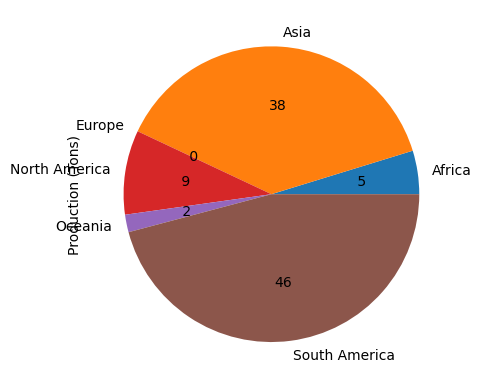

In [31]:
df_continent["Production (Tons)"].plot(kind="pie",autopct="%2.f")